In [13]:
import pandas as pd
import seaborn as sns
import embedding_spaces as es

from scipy.stats import spearmanr, pearsonr

# Generating `feedbacks.js`, the source for the feedback trials in the match-to-center game

## Ratings from Aria's experiment
These will make up the initial feedback trials, allowing us to start the experiment and bootstrap data collection for more feedback trials.

In [14]:
ratings = pd.read_csv('pit_data_48_people_valid.csv')[
    ['Choice1', 'Concept', 'Choice2', 'sliders_revised']
]
display(ratings)

,Choice1,Concept,Choice2,sliders_revised
0,alligator,seal,bat,61
1,alligator,seal,bat,29
2,alligator,seal,bat,43
3,alligator,seal,bat,42
4,alligator,seal,bat,27
...,...,...,...,...
7175,turtle,peacock,vulture,48
7176,turtle,peacock,vulture,16
7177,turtle,peacock,vulture,90
7178,turtle,peacock,vulture,66


In [15]:
ratings_mean = ratings.groupby(['Choice1', 'Concept', 'Choice2']).mean()
display(ratings_mean)

sliders_revised
Choice1   Concept Choice2                 
alligator bat     caribou        52.510638
                  deer           48.479167
                  pig            51.062500
          beaver  caribou        58.020833
          cougar  camel          69.625000
...                                    ...
seal      penguin vulture        48.404255
squirrel  dog     turkey         30.212766
tiger     rat     vulture        53.106383
          sheep   turkey         37.958333
turtle    peacock vulture        77.604167

[150 rows x 1 columns]

## Choices from match-to-center task
This is real data from our match-to-center task, which means these are binary responses. By averaging over trials that have more than one response, we can get percentages for some trials.

We'll start by selecting trials that have 3 or more responses, but as the experiment progresses we can raise that threshold so that the percentages will seem more continuous (i.e. instead of just 0%, 50%, and 100%, participants should see e.g. 65% sometimes).

In [48]:
choices = es.process_regular_trials()[
    ['bottomword', 'middleword', 'topword', 'chose_topword']
]
choices.topword = choices.topword.apply(lambda x: x.split()[-1])
choices.middleword = choices.middleword.apply(lambda x: x.split()[-1])
choices.bottomword = choices.bottomword.apply(lambda x: x.split()[-1])
display(choices)

usable participants: 81
usable trials: 14573


,bottomword,middleword,topword,chose_topword
1,jump,whale,stand,0
2,whale,jump,dolphin,1
3,sad,dolphin,jump,1
6,strong,pigeon,seal,1
7,crow,seal,pigeon,0
...,...,...,...,...
493,money,gray,deceive,1
497,nose,milk,woman,1
498,add,woman,milk,1
500,vein,speak,message,1


In [49]:
choices_mean = choices.groupby(['bottomword', 'middleword', 'topword']).agg(
    count=('chose_topword', 'count'), percentage=('chose_topword', 'mean')
)
choices_mean.percentage *= 100
display(choices_mean.query('count >= 3'))

count  percentage
bottomword middleword topword                   
add        chair      cheap        3       100.0
           family     nest         3       100.0
arm        arrive     hair         3       100.0
           hear       bother       6       100.0
           message    forget       3       100.0
...                              ...         ...
weak       sick       destroy      3         0.0
weight     pain       carry        3         0.0
white      naked      hair         3         0.0
word       seek       melt         3       100.0
           weak       dish         4       100.0

[111 rows x 2 columns]

## Other-ratings in percentages from feedback trials
These are the responses participants gave in the feedback trials. Ultimately we'll want to compare these responses to the actual choices collected in the match-to-center task, to see if participants are good at judging what ratings other participants provide, on average.

In [50]:
feedbacks = es.process_feedback_trials()[
    ['bottomword', 'middleword', 'topword', 'percentage']
]
display(feedbacks)

usable participants: 81
usable trials: 5868


,bottomword,middleword,topword,percentage
4,rooster,vulture,turtle,0.0
9,duck,caribou,camel,100.0
13,alligator,dolphin,cow,27.0
18,duck,turkey,dog,0.0
21,bat,dog,chicken,41.0
...,...,...,...,...
491,rat,horse,rooster,36.0
494,vulture,rat,tiger,42.0
496,turtle,seal,elk,70.0
499,frog,dolphin,elk,41.0


In [51]:
feedbacks_mean = feedbacks.groupby(['bottomword', 'middleword', 'topword']).mean()
display(feedbacks_mean)

percentage
bottomword middleword topword            
add        chair      cheap     58.000000
           family     nest      78.500000
           ladder     clever    40.714286
alligator  bat        caribou   43.807692
                      deer      47.071429
...                                   ...
zebra      cow        rooster   26.000000
           goat       chicken   62.000000
           horse      chicken   12.555556
           peacock    elk       36.000000
           seal       peacock   50.000000

[540 rows x 1 columns]

## Relationship between Aria's data, match-to-center choices, and other-rating feedback percentages
For now, most of our feedback data does not overlap with the choice data, because the original feedback trials were composed using data from an experiment Aria did, and she used triads that we do not have in our experiment.

However, we _can_ compare the original rating data Aria collected with the feedback percentages we have collected (see below).

The more recent feedback trials _do_ overlap with participant choice data, so soon we'll have some data to compare choices and feedback percentages.

In [52]:
df = feedbacks_mean.reset_index().merge(
    ratings_mean.reset_index(), how='outer',
    left_on=['bottomword', 'middleword', 'topword'],
    right_on=['Choice1', 'Concept', 'Choice2']
)
display(df)

,bottomword,middleword,topword,percentage,Choice1,Concept,Choice2,sliders_revised
0,add,chair,cheap,58.000000,NaN,NaN,NaN,NaN
1,add,family,nest,78.500000,NaN,NaN,NaN,NaN
2,add,ladder,clever,40.714286,NaN,NaN,NaN,NaN
3,alligator,bat,caribou,43.807692,alligator,bat,caribou,52.510638
4,alligator,bat,deer,47.071429,alligator,bat,deer,48.479167
...,...,...,...,...,...,...,...,...
535,zebra,cow,rooster,26.000000,NaN,NaN,NaN,NaN
536,zebra,goat,chicken,62.000000,NaN,NaN,NaN,NaN
537,zebra,horse,chicken,12.555556,NaN,NaN,NaN,NaN
538,zebra,peacock,elk,36.000000,NaN,NaN,NaN,NaN


In [53]:
spearmanr(df.percentage, df.sliders_revised, nan_policy='omit')

SpearmanrResult(correlation=0.7379466797898123, pvalue=4.668679487428951e-27)

<AxesSubplot: xlabel='sliders_revised', ylabel='percentage'>

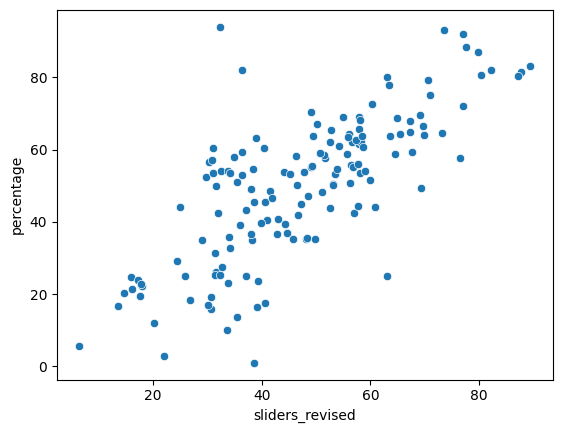

In [54]:
sns.scatterplot(x=df.sliders_revised, y=df.percentage)

## Create new feedbacks.js file
Using the match-to-center choice data and the original ratings collected by Aria, we can generate new feedback trials to use in the match-to-center task.

In [62]:
df = pd.concat([
    ratings_mean.reset_index().rename(columns={
        'Choice1': 'bottomword',
        'Concept': 'middleword',
        'Choice2': 'topword',
        'sliders_revised': 'percentage',
    }),
    choices_mean.reset_index().query('count >= 3')
]).reset_index(drop=True)
display(df.round(2))

,bottomword,middleword,topword,percentage,count
0,alligator,bat,caribou,52.51,NaN
1,alligator,bat,deer,48.48,NaN
2,alligator,bat,pig,51.06,NaN
3,alligator,beaver,caribou,58.02,NaN
4,alligator,cougar,camel,69.62,NaN
...,...,...,...,...,...
256,weak,sick,destroy,0.00,3.0
257,weight,pain,carry,0.00,3.0
258,white,naked,hair,0.00,3.0
259,word,seek,melt,100.00,3.0


In [59]:
df.groupby(['bottomword', 'middleword', 'topword']).mean()

percentage  count
bottomword middleword topword                   
add        chair      cheap    100.000000    3.0
           family     nest     100.000000    3.0
alligator  bat        caribou   52.510638    NaN
                      deer      48.479167    NaN
                      pig       51.062500    NaN
...                                   ...    ...
weak       sick       destroy    0.000000    3.0
weight     pain       carry      0.000000    3.0
white      naked      hair       0.000000    3.0
word       seek       melt     100.000000    3.0
           weak       dish     100.000000    4.0

[261 rows x 2 columns]

In [36]:
txt = f"""
export const tops_sorted = ['{"', '".join(df.topword)}'];

export const bottoms_sorted = ['{"', '".join(df.bottomword)}'];

export const middles_sorted = ['{"', '".join(df.middleword)}'];

export const pcts_sorted = [{', '.join(df.percentage.astype(str))}];
"""

with open('feedbacks.js', 'w') as feedbackfile:
    feedbackfile.write(txt)